## **Task 1 - Predicting the price of a house using Regression**

**IMPORTING LIB**

In [1]:
import numpy as np
import pandas as pd

**LOAD AND PREPROCESS THE DATA**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [33]:
data=pd.read_csv("Housing.csv")

In [34]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [35]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [36]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**REGRESSION ALGORITHM**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [38]:
data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)


In [39]:
x_categorical = data[['mainroad', 'guestroom', 'basement','prefarea','airconditioning']]
x_numeric= data[['area','bedrooms','bathrooms','parking','stories']]
y= data['price']
x = pd.concat([x_categorical, x_numeric], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

**Metrics**

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("MSE:",mse)
print("MAE:",mae)
print("R Square:",r2)
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

MSE: 1869675610682.8596
MAE: 1002734.6198845842
R Square: 0.6301019632619831
Coefficient: [4.02439338e+05 2.37243647e+05 4.48815966e+05 6.18691270e+05
 7.48853459e+05 2.38283289e+02 7.96453369e+04 1.12276546e+06
 2.63323544e+05 4.39686141e+05]
Intercept: -66032.81079287361


**VISUALISATION**

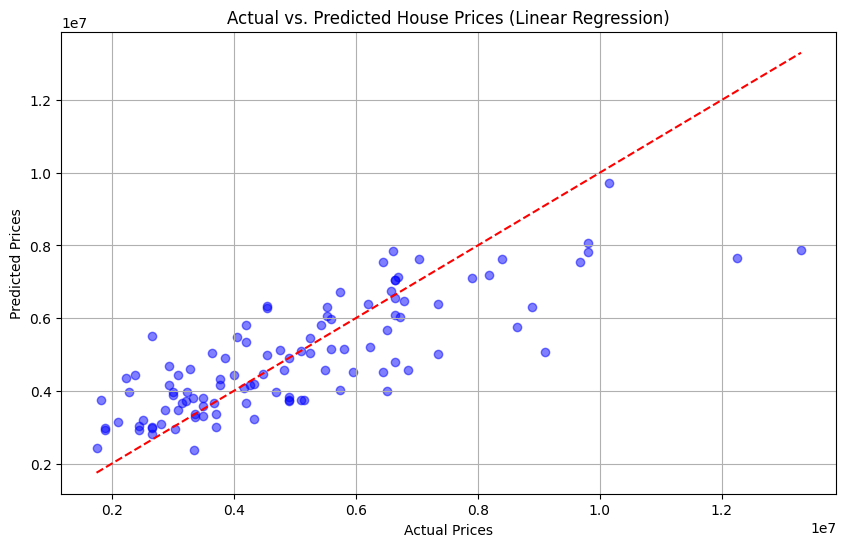

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted House Prices (Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()
